<a href="https://colab.research.google.com/github/seosztt/ML_Project/blob/master/inout_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# colab 사용자만 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 -> 런타임 다시 시작하고 아래 한글폰트 설정 시작
# 위에서 csv 파일은 다시 불러와야함.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,362 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_te

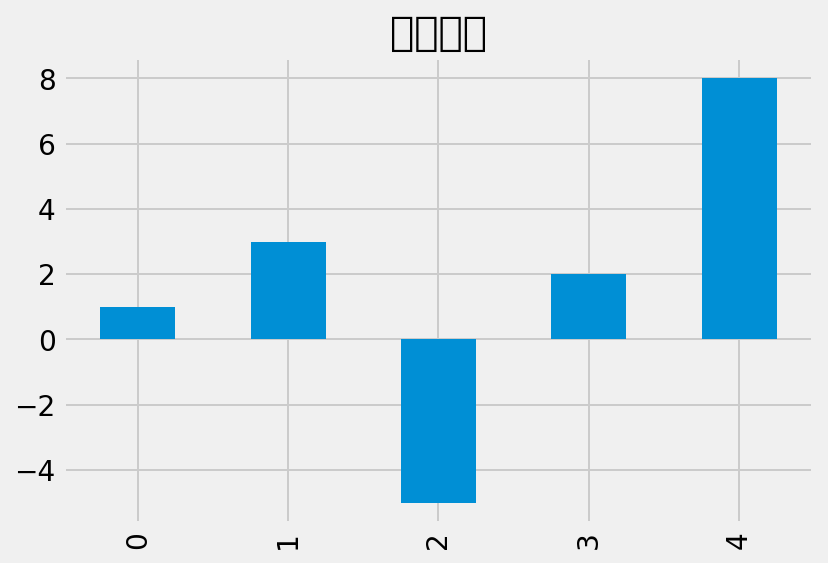

In [ ]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='NanumBarunGothic') 
plt.style.use('fivethirtyeight')
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1,3,-5,2,8]).plot.bar(title='한글제목')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

CSP=pd.read_csv('/content/drive/MyDrive/2조/datasets/전처리/inout_merge.csv')

In [ ]:
CSP

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather,inn,out
0,4,5,23,2,26,598.39,21,8,3159,9739,307653,영천,2027.112,271.105
1,4,5,79,2,26,662.87,21,8,3159,9739,307653,영천,2027.112,271.105
2,4,6,25,2,26,586.33,21,8,3159,9739,307653,영천,2027.112,271.105
3,4,17,48,2,26,766.64,21,8,3159,9739,307653,영천,2027.112,271.105
4,0,5,17,2,26,709.49,21,8,3159,9739,307653,영천,2027.112,271.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26171,0,3,7,0,6,1302.47,16,1,217,6046,13120,서울,24407.001,1.000
26172,3,3,7,0,6,1013.94,16,1,217,6046,13120,서울,24407.001,1.000
26173,3,5,23,5,23,979.14,16,1,21,7445,1564,부산,24407.001,1.000
26174,1,15,44,9,19,1700.00,16,1,453,6270,28405,서산,24407.001,1.000


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
CSP['weather']=LE.fit_transform(CSP['weather'])

In [ ]:
CSP

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather,inn,out
0,4,5,23,2,26,598.39,21,8,3159,9739,307653,23,2027.112,271.105
1,4,5,79,2,26,662.87,21,8,3159,9739,307653,23,2027.112,271.105
2,4,6,25,2,26,586.33,21,8,3159,9739,307653,23,2027.112,271.105
3,4,17,48,2,26,766.64,21,8,3159,9739,307653,23,2027.112,271.105
4,0,5,17,2,26,709.49,21,8,3159,9739,307653,23,2027.112,271.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26171,0,3,7,0,6,1302.47,16,1,217,6046,13120,18,24407.001,1.000
26172,3,3,7,0,6,1013.94,16,1,217,6046,13120,18,24407.001,1.000
26173,3,5,23,5,23,979.14,16,1,21,7445,1564,11,24407.001,1.000
26174,1,15,44,9,19,1700.00,16,1,453,6270,28405,17,24407.001,1.000


In [ ]:
CSP.to_csv('/content/drive/MyDrive/2조/datasets/전처리/inout_merge_LabelEncode_weather_column.csv')

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(CSP,
                               test_size = 0.2,
                               random_state = 2045)

train.shape, test.shape

((20940, 14), (5236, 14))

In [ ]:
train.to_csv('/content/drive/MyDrive/2조/datasets/전처리/train_inout_merge_random_state2045.csv')
test.to_csv('/content/drive/MyDrive/2조/datasets/전처리/test_inout_merge_random_state2045.csv')

# RandomforestRefressor

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/2조/datasets/전처리/train_inout_merge_random_state2045.csv')
test=pd.read_csv('/content/drive/MyDrive/2조/datasets/전처리/test_inout_merge_random_state2045.csv')

In [ ]:
train.drop(columns=['Unnamed: 0'],inplace=True)
test.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## all_columns

In [ ]:
X_train=train.drop(columns=['price'])
y_train=train['price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

RF=RandomForestRegressor(random_state=2045)

scores=cross_val_score(RF,
                       X_train,
                       y_train,
                       scoring='neg_mean_squared_error',
                       cv=5)


In [ ]:
import numpy as np
np.sqrt(-scores.mean())

1550.5531456678582

## wide, year 제거

In [ ]:
X_train=train.drop(columns=['price','wide','year'])
y_train=train['price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

RF=RandomForestRegressor(random_state=2045)

scores=cross_val_score(RF,
                       X_train,
                       y_train,
                       scoring='neg_mean_squared_error',
                       cv=5)


In [ ]:
import numpy as np
np.sqrt(-scores.mean())

1539.9604646868706

In [ ]:
X_train=train.drop(columns=['price','wide','year'])
y_train=train['price']

In [ ]:
RF=RandomForestRegressor(random_state=2045)
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2045, verbose=0, warm_start=False)

In [ ]:
X_test=test.drop(columns=['price','wide','year'])
y=test['price']

yhat=RF.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y, yhat)
np.sqrt(mse)

1468.2843044937122

## feature importance

# XGBRegressor

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/2조/datasets/전처리/train_inout_merge_random_state2045.csv')
test=pd.read_csv('/content/drive/MyDrive/2조/datasets/전처리/test_inout_merge_random_state2045.csv')

train.drop(columns=['Unnamed: 0'],inplace=True)
test.drop(columns=['Unnamed: 0'],inplace=True)

## all_columns

In [ ]:
X_train=train.drop(columns=['price'])
y_train=train['price']

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

XGB=XGBRegressor()

scores=cross_val_score(XGB,
                       X_train,
                       y_train,
                       scoring='neg_mean_squared_error',
                       cv=5)

[07:16:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
import numpy as np
np.sqrt(-scores.mean())

# OLS

## all columns

*   승연님 하신 거에서 whether column 추가



In [ ]:
import statsmodels.formula.api as smf

OLS = smf.ols(formula = 'price ~ kind + market + corp + wide + city + year + month + area + ratio + amount + weather + inn + out',
                data = train).fit()
yhat = OLS.predict(test[['kind', 'market', 'corp', 'wide', 'city', 'year',
                         'month', 'area', 'ratio', 'amount','weather', 'inn', 'out']])

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(test['price'], yhat)
np.sqrt(mse)

263.2228124028964

## wide, year 제거

In [ ]:
OLS2 = smf.ols(formula = 'price ~ kind + market + corp + city + month + area + ratio + amount + weather + inn + out',
                data = train).fit()
yhat2 = OLS2.predict(test[['kind', 'market', 'corp', 'city',
                         'month', 'area', 'ratio', 'amount','weather', 'inn', 'out']])

In [ ]:
mse2 = mean_squared_error(test['price'], yhat2)
np.sqrt(mse2)

266.39639010394507